In [1]:
from importlib.resources import files
import pyqrlew as qrl

In [2]:
# Read data

with files(qrl).joinpath('data/retail_demo/dataset.json').open('r') as f:
    dataset = f.read()

with files(qrl).joinpath('data/retail_demo/schema.json').open('r') as f:
    schema = f.read()

with files(qrl).joinpath('data/retail_demo/size.json').open('r') as f:
    size = f.read()

dataset = qrl.Dataset(dataset, schema, size)

In [3]:
dataset.relations()

[(['private', 'campaign_descriptions'], <Relation at 0x104da02a0>),
 (['private', 'campaigns'], <Relation at 0x104da05a0>),
 (['private', 'coupon_redemptions'], <Relation at 0x104da05d0>),
 (['private', 'coupons'], <Relation at 0x104da0600>),
 (['private', 'demographics'], <Relation at 0x104da0ae0>),
 (['private', 'households'], <Relation at 0x104da0bd0>),
 (['private', 'products'], <Relation at 0x104da0c00>),
 (['private', 'promotions'], <Relation at 0x104da0e10>),
 (['private', 'transactions'], <Relation at 0x104da0480>)]

In [4]:
dataset.relations()[0][1].dot()

'digraph graph_dpgr {\n\n        rankdir="TB";\n        splines=true;\n        overlap=false;\n        nodesep="0.2";\n        ranksep="0.4";\n        labelloc="t";\n        fontname="Ovo,Red Hat Text";\n        fontsize="11pt"\n        bgcolor="#00000000"\n\n            node [ shape="box" style="filled,rounded" margin=0.2, fontname="Red Hat Display,sans-serif", fontsize="11pt", color="#00000055" ]\n            edge [ fontname="Red Hat Text" color="#2B303A" ]\n            \n    graph_dpgr[label=<<b>CAMPAIGN_DESCRIPTIONS size ∈ int{27}</b><br/>index = index ∈ int{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26}<br/>campaign_id = campaign_id ∈ id<br/>campaign_type = campaign_type ∈ str<br/>start_date = start_date ∈ datetime{2016-11-14 00:00:00, 2016-12-06 00:00:00, 2016-12-28 00:00:00, 2017-02-08 00:00:00, 2017-0...<br/>end_date = end_date ∈ datetime{2017-01-16 00:00:00, 2017-02-05 00:00:00, 2017-02-19 00:00:00, 2017-03-26 00:00:00, 2017-0

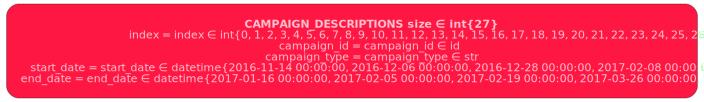

In [5]:
import graphviz
from IPython.display import display

display(graphviz.Source(dataset.relations()[0][1].dot()))

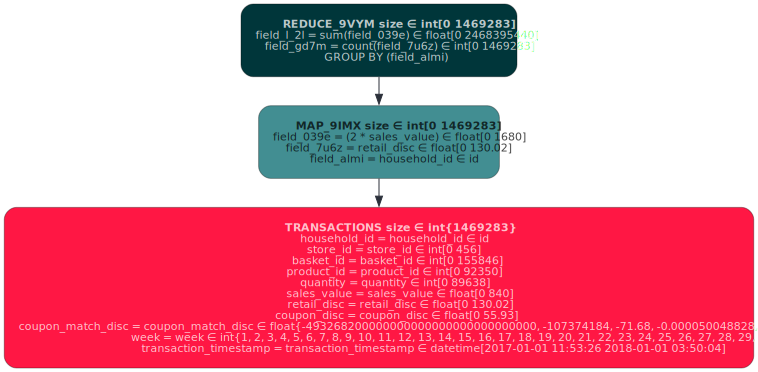

In [6]:
result = dataset.sql('select sum(2*sales_value), count(retail_disc) from transactions group by household_id')

display(graphviz.Source(result.dot()))

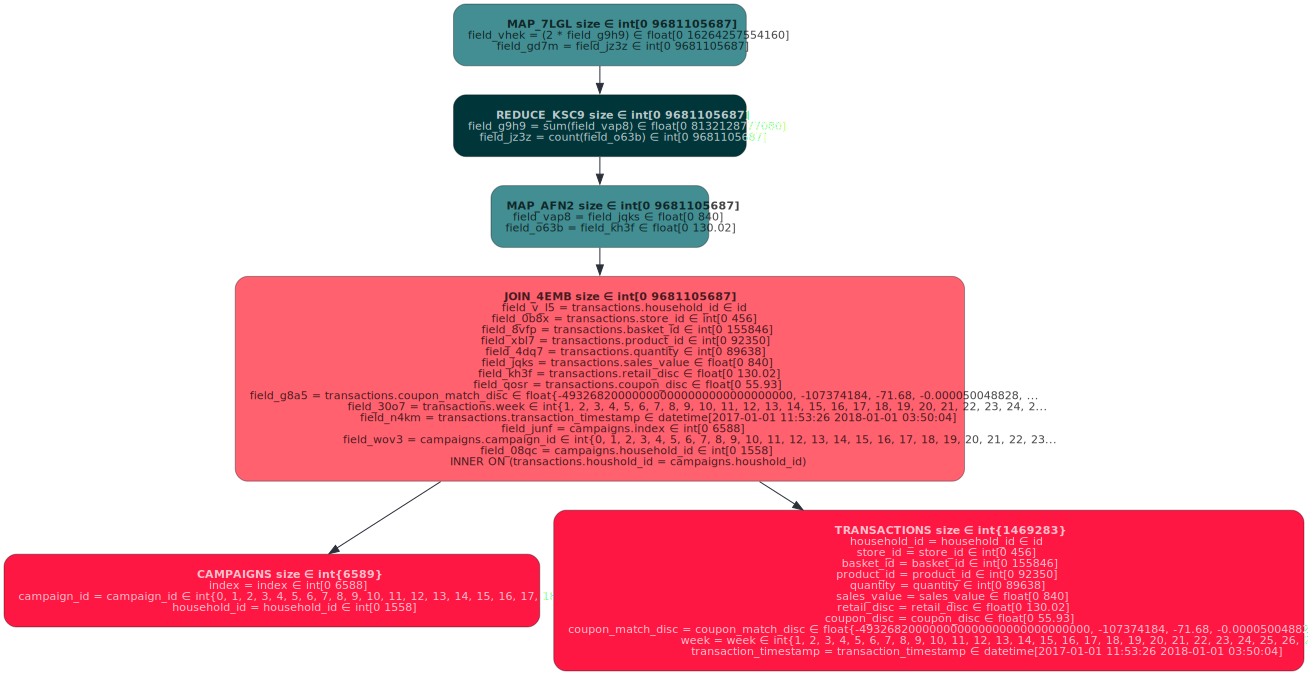

In [7]:
result = dataset.sql('select 2*sum(sales_value), count(retail_disc) from transactions join campaigns on transactions.houshold_id=campaigns.houshold_id')

display(graphviz.Source(result.dot()))